In [1]:
import csv
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
def defs_to_pandas(fpath):
    with open(fpath) as f:
        defs = [line.split(sep='|') for line in f]

    num_defs = len(defs[1:])

    words, timestamps, authors, meanings = [""]*num_defs, [0]*num_defs, [""]*num_defs, [""]*num_defs
    examples, dates = [""]*num_defs, [""]*num_defs
    numLikes, numDislikes, tagLists = [0]*num_defs, [0]*num_defs, [""]*num_defs

    for i, line in enumerate(defs[1:]):
        words[i], timestamps[i], authors[i], meanings[i], \
        examples[i], dates[i], numLikes[i], numDislikes[i], tagLists[i] = line

    defs_df = pd.DataFrame({
        "word":words,
        "timestamp":timestamps,
        "author":authors,
        "meaning":meanings,
        "example":examples,
        "date":dates,
        "num_likes":numLikes,
        "num_dislikes":numDislikes,
        "taglist":tagLists
    })

    defs_df["date"] = defs_df.date.apply(process_date)
    defs_df["word"] = defs_df.word.apply(lambda x : x.replace('%20',' '))
    defs_df["num_likes"] = defs_df.num_likes.apply(str_to_int)
    defs_df["num_dislikes"] = defs_df.num_dislikes.apply(str_to_int)
    #defs_df["timestamp_date"] = defs_df.timestamp.apply(timestamp_to_date)
    defs_df.to_csv("defs.csv")

def process_date(date_string):
    """
    turn date of format day-month-year into format year-month-day
    e.g. '05-03-2019' turns into '2019-03-05'
    """
    day = date_string[:2]
    month = date_string[3:5]
    year = date_string[6:]
    return ("-").join([year,month,day])

def str_to_int(x):
    try:
        return int(x)
    except:
        return -1

def timestamp_to_date(x):
    try:
        return time.ctime(int(str(x)[:-3]))
    except:
        return -1

In [7]:
defs = pd.read_csv("data/defs.csv")
defs.head()

/Users/andreasopedal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,word,timestamp,author,meaning,example,date,num_likes,num_dislikes,taglist
0,0,b stalking,1569405587337,Jennay200812,when someone gives you so much information to ...,"""So how did you date go?"" ""Horrible. This chic...",2008-07-10,2,1,#facebook#e-mail#bad date#stalker#backwards st...
1,1,Compound-Sampling,1569405587903,NARRATR,The process of taking 2 samples and putting th...,"Yo, that was so crazy when Jay Versace started...",2019-03-05,0,0,##sampling #music#producing#narratr\n
2,2,Between a Song and a hard place,1569405588179,Quit Raping my Cat,"When you find a song you really like, listen t...","""man, i listened to Feel me Flow by Naughty by...",2010-01-16,3,2,#music#ipod#itunes#song#irritating\n
3,3,DHEP,1569405588359,Dr. Krolin Berkox,A word with no original language used to call ...,"The new word DHEP is such a DHEP, that it's a ...",2018-05-21,2,1,#noob; failure; flop; stupid; useless;\n
4,4,DHET,1569405588616,Godard Chan,Dude Hates Everything Thoughtful... an adjecti...,That DHET should think more about what he says...,2008-08-22,4,4,#dude#hates#everything#thoughtful#likes#funny#...


In [7]:
defs.shape

(3534966, 10)

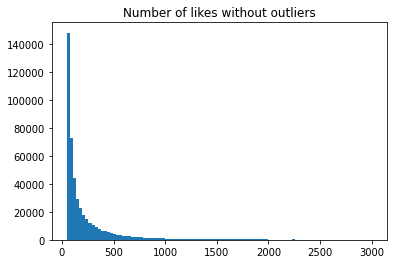

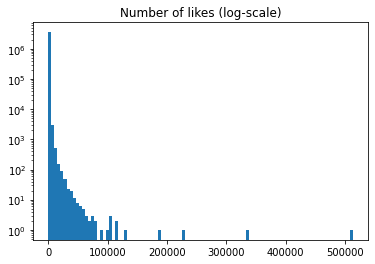

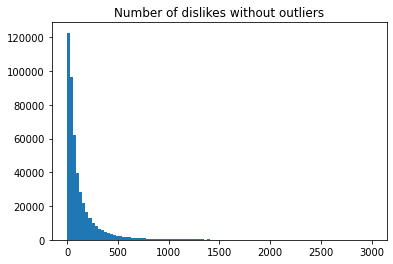

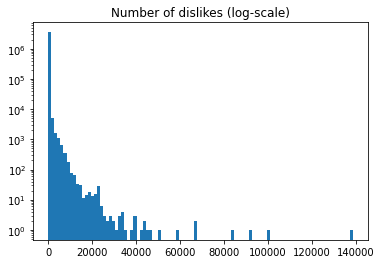

In [12]:
# remove outliers
hist_df = defs[(defs["num_likes"] < 3000) & (defs["num_likes"] > 50) & (defs["num_dislikes"] < 3000)]
plt.hist(hist_df["num_likes"], bins = 100)
plt.title("Number of likes without outliers")
plt.show()
plt.hist(defs["num_likes"], bins = 100, log = True)
plt.title("Number of likes (log-scale)")
plt.show()
plt.hist(hist_df["num_dislikes"], bins = 100)
plt.title("Number of dislikes without outliers")
plt.show()
plt.hist(defs["num_dislikes"], bins = 100, log = True)
plt.title("Number of dislikes (log-scale)")
plt.show()

* Look at a few examples with 20, 50, 100 likes
* Look at a few examples with 20, 50, 100 dislikes
* Look at a few examples with likes ~= dislikes, likes ~= 2 x dislikes, likes ~= 10 x dislikes
* Look at percentage of unigrams

In [13]:
def print_likes_examples(df, num_likes, num_examples, seed = 10):
    np.random.seed(seed)
    if num_likes < 1000:
        temp = df[df["num_likes"] == num_likes]
        temp = temp.sample(frac = 1)[:num_examples]
        print("[EXAMPLES WITH {} LIKES]\n".format(num_likes))
    else: 
        temp = df[df["num_likes"] >= num_likes]
        temp = temp.sample(frac = 1)[:num_examples]
        print("[EXAMPLES WITH >={} LIKES]\n".format(num_likes))
    for i in range(0,num_examples):
        entry = temp.iloc[i,:]
        print('Word "{}" with meaning "{}" and examples "{}"\n'.format(entry["word"], entry["meaning"], entry["example"]))

def print_dislikes_examples(df, num_dislikes, num_examples, seed = 10):
    np.random.seed(seed)
    if num_dislikes < 1000:
        temp = df[df["num_dislikes"] == num_dislikes]
        temp = temp.sample(frac = 1)[:num_examples]
        print("[EXAMPLES WITH {} DISLIKES]\n".format(num_dislikes))
    else: 
        temp = df[df["num_dislikes"] >= num_dislikes]
        temp = temp.sample(frac = 1)[:num_examples]
        print("[EXAMPLES WITH >={} DISLIKES]\n".format(num_dislikes))
    for i in range(0,num_examples):
        entry = temp.iloc[i,:]
        print('Word "{}" with meaning "{}" and examples "{}"\n'.format(entry["word"], entry["meaning"], entry["example"]))

In [14]:
# Likes examples
print_likes_examples(defs, 2, 5)
print_likes_examples(defs, 20, 5)
print_likes_examples(defs, 50, 5)
print_likes_examples(defs, 100, 5)
print_likes_examples(defs, 1000, 5)

[EXAMPLES WITH 2 LIKES]

Word "Wooja" with meaning "when something is extremely cute, adorable, or sometimes sarcastically used." and examples "when an elderly lady comes and pinches your cheeks, she would probably say "awwhh wooojaaa" "that's adorable" "so cute!" "awww!" "hawmahgawd" "d'aww" "omg, wooja, so adorbz!""

Word "Milf Magnet" with meaning "A male 18-25 that is typically considered the "nice guy" and is ignored by other girls; a guy that is willing to accept a woman who is pregnant and/or has infants as long as the relationship is right. These are usually teen moms or moms in their young 20's wherein the biological father is not involved whatsoever, allowing the young male to move in as the father figure before the child gets too old to worry." and examples ""all the teen moms were looking to john for the stability, and the fact he had a secure job. he was lonely and vulnerable to her seduction. he is a milf magnet...""

Word "Hyperventilbating" with meaning "The act of mast

In [15]:
print_dislikes_examples(defs, 20, 5)
print_dislikes_examples(defs, 50, 5)
print_dislikes_examples(defs, 100, 5)
print_dislikes_examples(defs, 1000, 5)

[EXAMPLES WITH 20 DISLIKES]

Word "Headscissor" with meaning "A wrestling hold in which the woman clasps her opponent's head between her legs, face-to-bottom and squeezes their head to punish their opponent or force a submission." and examples "She punished her opponent with a powerful head scissors"

Word "Banana" with meaning "another word for a telephone" and examples "shut the fuck up! Can't you see I'm on the banana!"

Word "Yeam" with meaning "A quantity of 15. It can be used in the same context as the word "dozen." However, unlike a dozen, a baker's yeam is 14 so the baked goods will be easier to fit in a box. Also, since 15 is an odd number, a half yeam is rounded up to 8." and examples "I'd like a yeam of potatoes from the store."

Word "nerp" with meaning "1. Nerp A flat shapeless feature found on various parts of the human body 2. Nerps A Woman's breast that are grossly under developed. To the severity of having only nipples for breast. 3. Nerp an its y bits y Breast the siz

More interesting: Ratio between likes and dislikes

In [19]:
defs["like_ratio"] = defs["num_likes"] / defs["num_dislikes"]

In [20]:
def print_ratio_examples(df, min_ratio, max_ratio, min_num_likes, num_examples, seed = 10):
    np.random.seed(seed)
    temp = df[(df["num_likes"] >= min_num_likes) & (df["like_ratio"] >= min_ratio) &
             (df["like_ratio"] <= max_ratio)]
    temp = temp.sample(frac = 1)[:num_examples]
    print("[EXAMPLES WITH {}<=RATIO<={} AND >={} LIKES]\n".format(min_ratio, max_ratio, min_num_likes))
    for i in range(0,num_examples):
        entry = temp.iloc[i,:]
        print('Word "{}" with meaning "{}" and examples "{}"\n'.format(entry["word"], entry["meaning"], entry["example"]))


In [21]:
print_ratio_examples(defs, 0.1, 0.2, 500, 5)
print_ratio_examples(defs, 0.5, 0.7, 500, 5)
print_ratio_examples(defs, 1, 2, 500, 5)
print_ratio_examples(defs, 2, 3, 500, 5)
print_ratio_examples(defs, 4, 6, 500, 5)
print_ratio_examples(defs, 10, 15, 500, 5)
print_ratio_examples(defs, 15, 100, 500, 5)

[EXAMPLES WITH 0.1<=RATIO<=0.2 AND >=500 LIKES]

Word "Lehman Sisters" with meaning "Wives/girlfriends of recently-orphaned Lehman Brothers executives who bond to share their collective, unexpected fall down the socio-economic ladder." and examples "Amande and Jane are now the Lehman Sisters 'cause the Devil took away their Prada when their boyfriends lost their jobs on Wall Street."

Word "SFA" with meaning "sweet fuck all. Amounting to nothing or very little" and examples "Wow what a waste, i did SFA this weekend."

Word "f%2Fu" with meaning "follow-up: to pursue in an effort to take further action" and examples ""Thanks for the f/u. I can always count on you to resolve my concerns promptly.""

Word "Mindy" with meaning "1.) "Mindy" meaning "short" or "Vertically challenged." Commonly known as "fun sized." 2.)Mindy also means "Easily amused."" and examples "Did you see how Mindy she was? She doesn't even have to get on her knees."

Word "TRDMC" with meaning "Tears Running Down My Che

In [22]:
print_likes_examples(defs, 10, 10)

[EXAMPLES WITH 10 LIKES]

Word "buffercup" with meaning "- someone's who's just so adorable and huggable" and examples ""Darling, you're such a buffercup!""

Word "Crud" with meaning "1) Stands for Chronic Really Ugly Disorder. Essentially, when someone is extremely hideous, they are said to be infected with CRUD. 2) An extremely hideous person who has sideburns, a pointy chin, bad acne, scraggly hair, and a large unibrow." and examples ""Ew. I looked so ugly at the party. I think I might have caught CRUD." "I'm a survivor of CRUD.""

Word "gair cut" with meaning "a really gay hair cut" and examples ""haha dood wat a fuckin gair cut""

Word "Nish" with meaning "Said randomly whenever something is boring." and examples ""This is sooo boring!" said Cara "Nish..." said Laura"

Word "philly points" with meaning "When the hairline of your sideburns is cut to come to a point." and examples "Yo you got dem philly points wit dat fresh ass fade kid."

Word "purplos" with meaning "1) A honey fla

In [23]:
print(sum(defs["num_likes"] > 5))
print(sum(defs["like_ratio"] > 10))
print(sum((defs["num_likes"] >= 5) & (defs["like_ratio"] >= 1.5)))

1782250
685153
1187680


### Unigram distribution

Ratio of unigrams:  0.6292937470968604


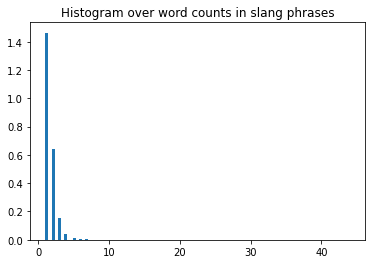

In [24]:
def count_words(phrase):
    if type(phrase) != str:
        phrase = str(phrase)
    l = phrase.split(' ')
    return len(l)

word_counts = defs["word"].apply(count_words)
print("Ratio of unigrams: ", np.count_nonzero(word_counts == 1) / defs.shape[0])
plt.hist(word_counts, bins = 100, density = True)
plt.title("Histogram over word counts in slang phrases")
plt.show()

In [9]:
def filter_and_write(df, min_num_likes, min_ratio):
    df["like_ratio"] = df["num_likes"] / df["num_dislikes"]
    newdf = df[(df["num_likes"] >= min_num_likes) & (df["like_ratio"] >= min_ratio)]
    print(df.shape, newdf.shape)
    newdf.to_csv("data/filtered_defs.csv")

In [2]:
def filter_sample_and_write(df, min_num_likes, min_ratio, name, sample_size = 10000):
    df["like_ratio"] = df["num_likes"] / df["num_dislikes"]
    newdf = df[(df["num_likes"] >= min_num_likes) & (df["like_ratio"] >= min_ratio)]
    newdf = newdf.sample(n=sample_size)
    print(df.shape, newdf.shape)
    newdf.to_csv(f"data/{name}.csv")

In [13]:
filter_and_write(defs, 20, 2)

(3534966, 11) (488010, 11)


In [9]:
filter_sample_and_write(defs, 20, 2, name = "filtered_100000_sampled", sample_size = 100000)

(3534966, 11) (100000, 11)
